In [91]:
# Softmax Regression

In [92]:
# 图像分类数据集(Fashion-MNIST)
import torch
import torchvision
import matplotlib.pyplot as plt 
from torch.utils import data 
from torchvision import transforms 


In [93]:
trans=transforms.ToTensor()
mnist_train=torchvision.datasets.FashionMNIST(
    root="./data/",train=True,transform=trans,
    download=False,
)
mnist_test=torchvision.datasets.FashionMNIST(
    root="./data/",train=False,transform=trans,
    download=False,
)

In [94]:
len(mnist_train),len(mnist_test)

(60000, 10000)

In [95]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [96]:
def get_fashion_mnist_labels(labels):
    """返回文本标签"""
    text_labels=[
        "t-shirt","trouser","pullover","dress",
        "coat","sandal","shirt","sneaker","bag",
        "ankle boot",
    ]
    return [text_labels[int(i)] for i in labels]


In [97]:
def show_images(imgs,num_rows,num_cols,titles=None,scale=1.5):
    """Plot a list of image"""
    figsize=(num_cols*scale,num_rows*scale)
    _,axes=plt.subplots(num_rows,num_cols,figsize=figsize)
    axes=axes.flatten()
    for i,(ax,img) in enumerate(zip(axes,imgs)):
        if torch.is_tensor(img):
            ax.imshow(img.numpy())
        else:
            ax.imshow(img)
        
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes
    


array([<AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'t-shirt'}>], dtype=object)

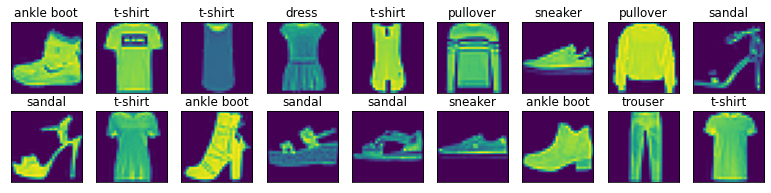

In [98]:
X,y=next(iter(data.DataLoader(mnist_train,batch_size=18)))
show_images(X.reshape(18,28,28),2,9,titles=get_fashion_mnist_labels(y))

In [99]:
batch_size=256

def get_dataloader_workers():
    """使用四个进程读取"""
    return 6

train_iter=data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=get_dataloader_workers())

In [100]:
import time 
start=time.time()
for X,y in train_iter:
    continue
end=time.time()
f"{end-start:.2f} sec"
# 实测6进程最快
# 需要测试读取速度
# 性能瓶颈

'2.03 sec'

In [101]:
def load_data_fashion_mnist(batch_size,resize=None):
    trans=[transforms.ToTensor()]
    if resize:
        trans.insert(0,transforms.Resize(resize))
    trans=transforms.Compose(trans)

    mnist_train = torchvision.datasets.FashionMNIST(
        root="./data/", train=True, transform=trans,
        download=False,
    )
    mnist_test = torchvision.datasets.FashionMNIST(
        root="./data/", train=False, transform=trans,
        download=False,
    )

    return (data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=get_dataloader_workers()),
        data.DataLoader(mnist_test,batch_size,shuffle=False,num_workers=get_dataloader_workers()))


In [102]:
train_iter,test_iter=load_data_fashion_mnist(32,resize=64)
for X,y in train_iter:
    print(X.shape,X.dtype,y.shape,y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


In [103]:
# softmax回归 从零开始实现
import torch
from IPython import display

batch_size=256
train_iter,test_iter=load_data_fashion_mnist(batch_size)

In [104]:
num_inputs=784
num_outputs=10

W=torch.normal(0,0.01,size=(num_inputs,num_outputs),requires_grad=True)
b=torch.zeros((num_outputs),requires_grad=True)
# 拿成向量会丢失空间信息
# 注意size格式size=(size[0],size[1],size[2],...)

In [105]:
def softmax(X):
    X_exp=torch.exp(X)
    partition=X_exp.sum(1,keepdim=True)
    return X_exp/partition

In [106]:
X=torch.tensor([2,3,4,-1]).reshape(1,-1)
softmax(X)

tensor([[0.0896, 0.2436, 0.6623, 0.0045]])

In [107]:
X=torch.normal(0,1,(2,5))
X_prob=softmax(X)
X,X_prob

(tensor([[-0.0785,  0.3897, -2.4951, -1.2136, -0.0894],
         [ 0.6651, -1.2954, -0.5364, -0.1048,  0.2407]]),
 tensor([[0.2502, 0.3996, 0.0223, 0.0804, 0.2475],
         [0.3908, 0.0550, 0.1175, 0.1810, 0.2557]]))

In [108]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1,W.shape[0])),W)+b)

In [109]:
X=torch.normal(0,1,(2,28,28))
print(X.reshape(-1,784).shape)
print(W.shape)
print(b.shape)
net(X)

torch.Size([2, 784])
torch.Size([784, 10])
torch.Size([10])


tensor([[0.1087, 0.0765, 0.0929, 0.1151, 0.0621, 0.1052, 0.0873, 0.0607, 0.1726,
         0.1189],
        [0.1189, 0.0890, 0.0774, 0.1208, 0.0654, 0.0933, 0.0791, 0.0983, 0.1376,
         0.1200]], grad_fn=<DivBackward0>)

In [110]:
y=torch.tensor([0,2])
y_hat=torch.tensor([[0.1,0.3,0.6],[0.3,0.2,0.5]])
y_hat[[0,1],y]

tensor([0.1000, 0.5000])

In [111]:
def cross_entropy(y_hat,y):
    return -torch.log(y_hat[range(len(y_hat)),y])

cross_entropy(y_hat,y)

tensor([2.3026, 0.6931])

In [112]:
# 预测类别与真实类别的比较
def accuracy(y_hat,y):
    """计算预测正确的数量"""
    if (len(y_hat.shape)>1) and (y_hat.shape[1]>1):
        y_hat=y_hat.argmax(axis=1)
    cmp=y_hat.type(y.dtype)==y
    return float(cmp.type(y.dtype).sum())
accuracy(y_hat,y)/len(y)

0.5

In [113]:
def evaluate_accuracy(net,data_iter):
    """计算在给定数据集上的精度"""
    # 如果用nn.module实现
    if isinstance(net,torch.nn.Module):
        net.eval()
    metric=torch.zeros((2))
    for X,y in data_iter:
        metric+=torch.tensor([accuracy(net(X),y),y.numel()])
    return metric[0]/metric[1]


In [114]:
evaluate_accuracy(net,test_iter)

tensor(0.1111)

In [115]:
#累加器
class Accumulator:
    """在n个变量上累加"""
    def __init__(self,n):
        self.data=[0.0]*n 
        
    def add(self,*args):
        self.data=[a +float(b) for a,b in zip(self.data,args)]
        
    def __getitem__(self,idx):
        return self.data[idx]
    

In [116]:
def evaluate_accuracy_Add(net, data_iter):
    """计算在给定数据集上的精度"""
    # 如果用nn.module实现
    if isinstance(net, torch.nn.Module):
        net.eval()
    metric = Accumulator(2)
    for X, y in data_iter:
        metric.add(accuracy(net(X), y), y.numel())
    return metric[0]/metric[1]


In [117]:
evaluate_accuracy_Add(net,test_iter)

0.1111

In [118]:
# Softmax 回归的训练
def train_epoch_ch3(net,train_iter,loss,updater):
    if isinstance(net,torch.nn.Module):
        net.train()
    metric=Accumulator(3)
    for X,y in train_iter:
        y_hat=net(X)
        l=loss(y_hat,y)
        if isinstance(updater,torch.optim.Optimizer):
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(
                float(l)*len(y),
                accuracy(y_hat,y),
                y.size().numel(),
            )
        else:
            l.sum().backward()
            updater(X.shape[0])
            metric.add(
                float(l.sum()),
                accuracy(y_hat,y),
                y.numel(),
            )
    return metric[0]/metric[2],metric[1]/metric[2]

In [119]:
lr=0.1
from d2l import torch as d2l


In [120]:
class Animator:  # @save
    """在动画中绘制数据"""

    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)


In [121]:
def train_ch3(net,train_iter,test_iter,loss,num_epochs,updater):
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    
    for epoch in range(num_epochs):
        train_metrics=train_epoch_ch3(net,train_iter,loss,updater)
        test_acc=evaluate_accuracy(net,test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss,train_acc=train_metrics

In [122]:
def updater(batch_size):
    return d2l.sgd([W,b],lr,batch_size)

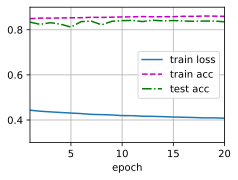

In [124]:
num_epochs=20
train_ch3(net,train_iter,test_iter,cross_entropy,num_epochs,updater)

In [128]:
# 对图像进行分类预测
from turtle import title


def predict_ch3(net,test_iter,n=10):
    for X,y in test_iter:
        break
    trues=d2l.get_fashion_mnist_labels(y)
    preds=d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles=[true +"\n" + pred for true,pred in zip(trues,preds)]
    d2l.show_images(X[0:n].reshape((n,28,28)),1,n,titles=titles[0:n])

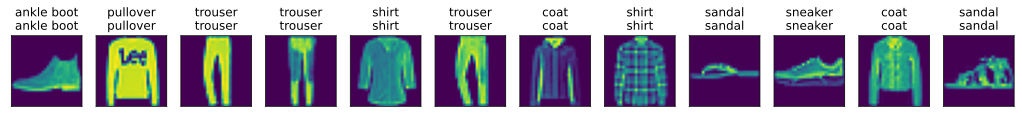

In [129]:
predict_ch3(net,test_iter,12)

In [130]:
# softmax回归的简洁实现
import torch
from torch import nn 
from d2l import torch as d2l 

batch_size=256
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)

In [131]:
# 展平
net=nn.Sequential(nn.Flatten(),nn.Linear(784,10))

def init_weights(m):
    if type(m)==nn.Linear:
        nn.init.normal_(m.weight,std=0.01)

In [132]:
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [133]:
loss=nn.CrossEntropyLoss()
trainer=torch.optim.SGD(net.parameters(),lr=0.01)

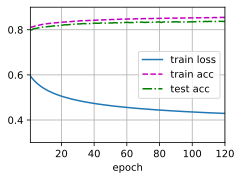

In [135]:
num_epochs=20
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)